# AlexNet

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(
    # 我们用的fashion_mnist所以通道是1，但是在alexnet上是3哦
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10)
)

In [4]:
# 看每一层输入输出的维度
X = torch.randn(1,1,224,224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

In [5]:
batch_size = 128
# 将28*28的Fashmnist扩充到224*224
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Mine\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Mine\AppData\Local\Temp\ipykernel_9864\827034827.py", line 2, in <module>
    d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())
  File "C:\Users\Mine\AppData\Roaming\Python\Python39\site-packages\d2l\torch.py", line 494, in train_ch6
    for i, (X, y) in enumerate(train_iter):
  File "C:\Users\Mine\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 628, in __next__
    data = self._next_data()
  File "C:\Users\Mine\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1316, in _next_data
    idx, data = self._get_data()
  File "C:\Users\Mine\anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1282, in _get_data
    success, data = self._try_get_data()
  File "C:\Users\Mine\anaconda3\lib\site-packages\torch\utils\data\

TypeError: object of type 'NoneType' has no len()

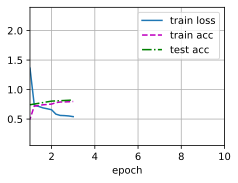

In [6]:
lr,num_epochs = 0.01,10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())